In [15]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
df_setosa = df[0:50]
df_versicolor = df[50:100]
df_virginica = df[100:150]

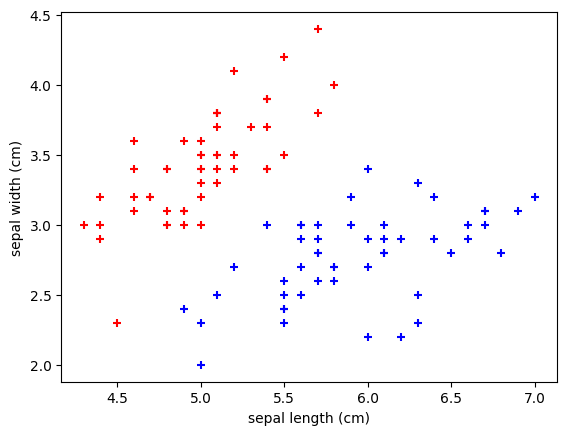

In [20]:
import matplotlib.pyplot as plt
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df_setosa["sepal length (cm)"], df_setosa["sepal width (cm)"], color="red", marker="+")
plt.scatter(df_versicolor["sepal length (cm)"], df_versicolor["sepal width (cm)"], color="blue", marker="+")
# plt.scatter(df_virginica["sepal length (cm)"], df_virginica["sepal width (cm)"], color="green", marker="+")

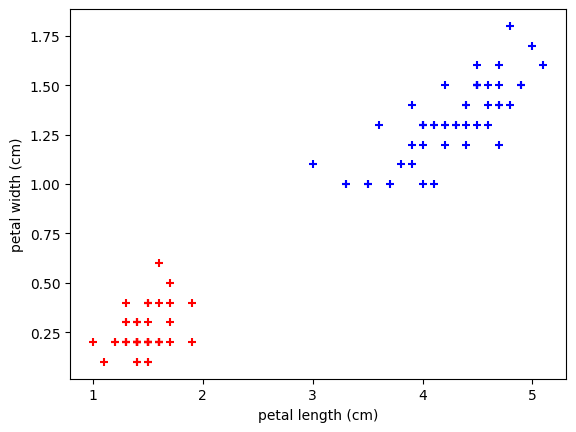

In [21]:
import matplotlib.pyplot as plt
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(df_setosa["petal length (cm)"], df_setosa["petal width (cm)"], color="red", marker="+")
plt.scatter(df_versicolor["petal length (cm)"], df_versicolor["petal width (cm)"], color="blue", marker="+")
# plt.scatter(df_virginica["petal length (cm)"], df_virginica["petal width (cm)"], color="green", marker="+")

In [23]:
feature = df.drop(["target"], axis="columns")
label = df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [30]:
knn.score(X_test, y_test)

1.0

In [33]:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 8,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 13]])

Text(58.222222222222214, 0.5, 'Truth')

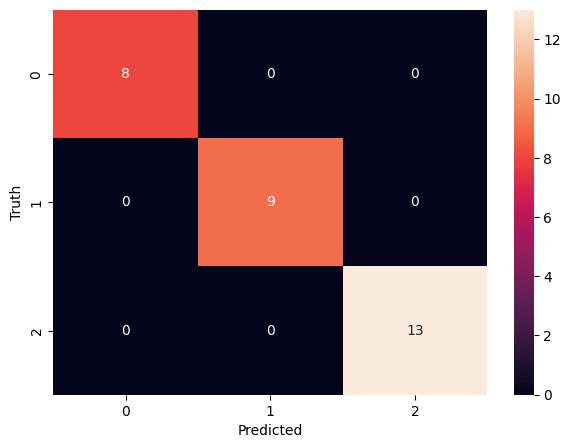

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

